# Challenge Data For Health

---



In [3]:
import os
import io
os.chdir("/home/medo/miniconda/UniBSV/")

In [4]:
# download of the unibsv git
if not os.path.exists("unibsv"):
  !git clone https://gitlab.com/data-challenge-gd4h/unibsv.git
!pip install pdfminer.six
!pip install pymupdf


# Test d'extraction

## Aperçu du pdf

In [5]:
# pdf_path = "/content/unibsv/data/UniBSV/BSV Languedoc-Roussillon/BSV_VITI_LR_N20_09082022.pdf"
# pdf_path = "/content/unibsv/data/UniBSV/BSV Languedoc-Roussillon/BSV_VITI_LR_N11_31052022.pdf"
# pdf_path = "/content/unibsv/data/UniBSV/BSV Languedoc-Roussillon/BSV_VITI_LR_N14_21062022.pdf"
# pdf_path = "/content/unibsv/data/UniBSV/BSV Languedoc-Roussillon/BSV_VITI_LR_N20_09082022.pdf"
pdf_path = "unibsv/data/UniBSV/BSV Languedoc-Roussillon/BSV_VITI_LR_N01_22032022.pdf"
pdf_name = os.path.split(pdf_path)[-1][:-4]

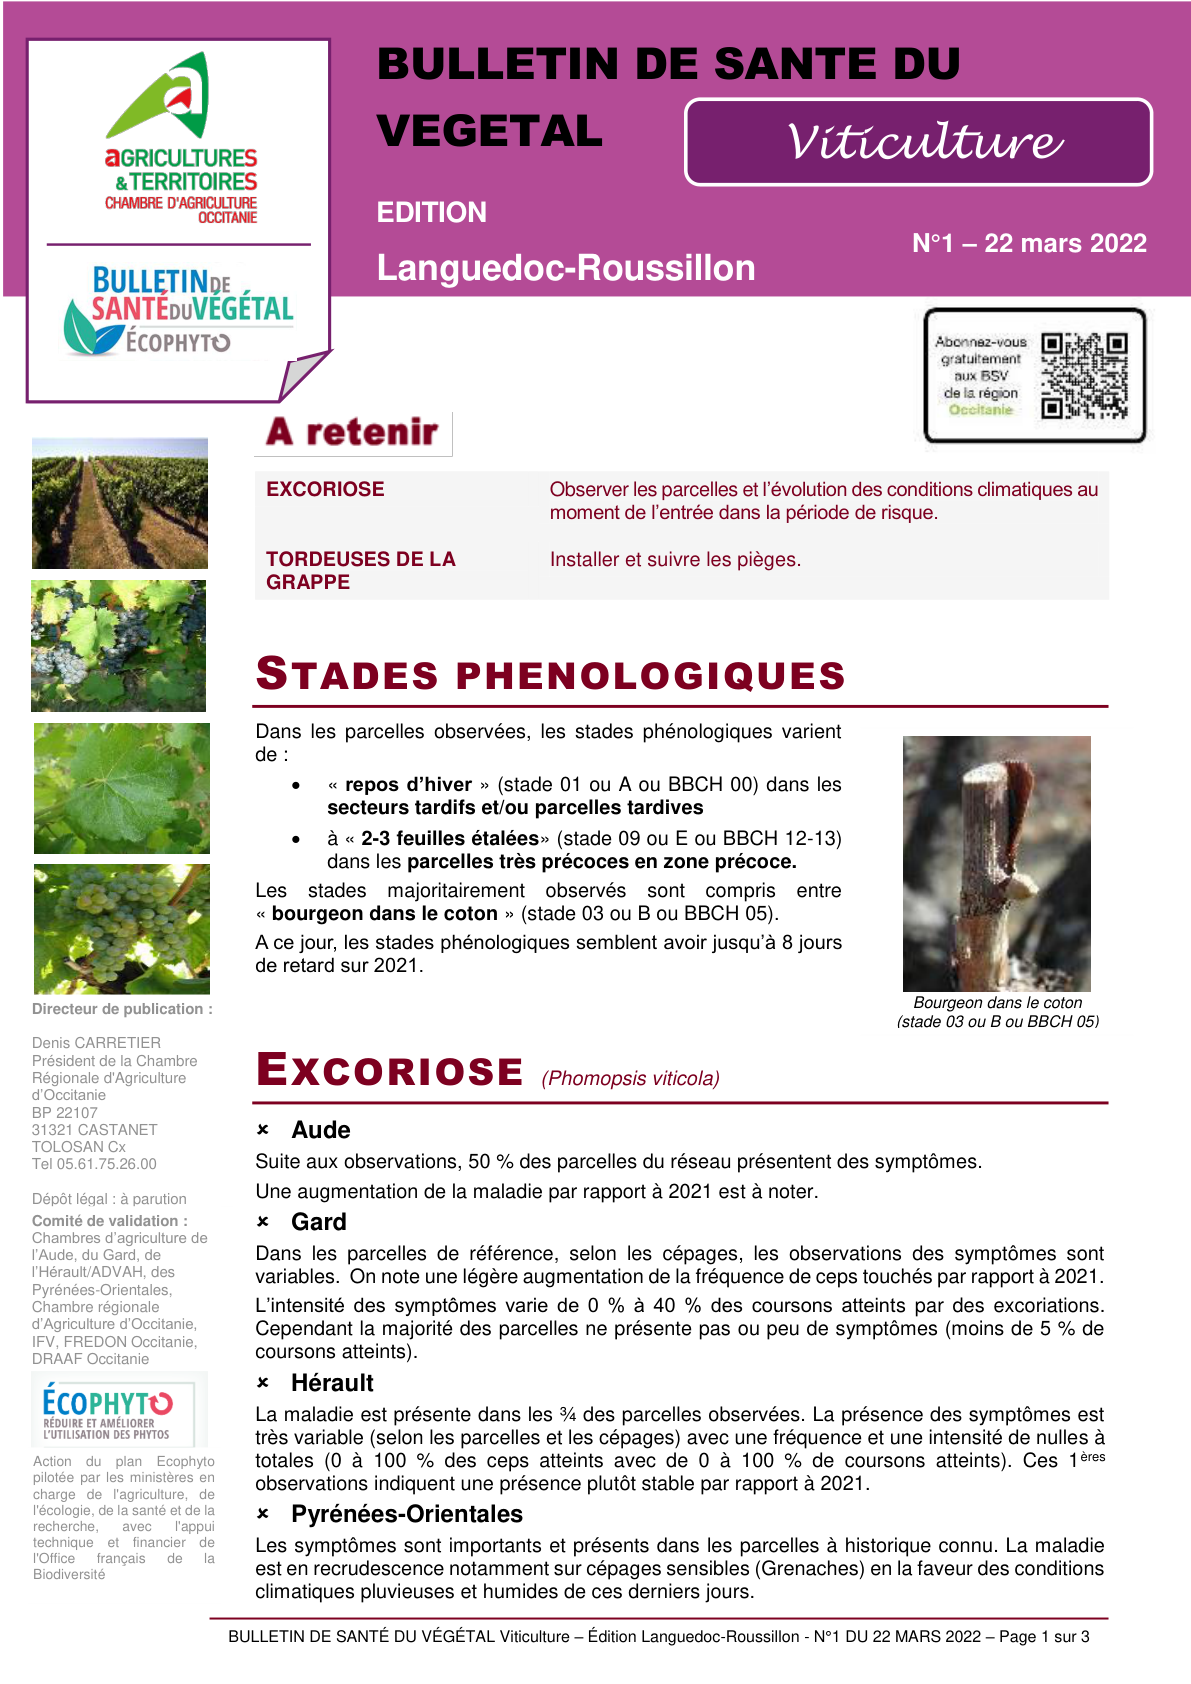

In [6]:
import fitz  # PyMuPDF
from PIL import Image
!mkdir -p out

# Définir le nom du fichier PDF et le numéro de la page à afficher
page_num = 0
max_display = 1

zoom_x = 2.0  # zoom horizontal
zoom_y = 2.0  # zoom vertical
mat = fitz.Matrix(zoom_x, zoom_y)  # matrice pour mettre à l'échelle la page

# Charger le PDF et convertir la page spécifiée en une image
doc = fitz.open(pdf_path)
for page in doc:
  page_num += 1
  if page_num <= max_display:
    pix = page.get_pixmap(matrix=mat)
    stream = pix.pil_tobytes(format="png", optimize=True)
    img = Image.open(io.BytesIO(stream))
    display(img)

## Structure du pdf


In [7]:
from pdfminer.high_level import extract_text, extract_pages
from IPython.display import display
from PIL import Image

In [8]:
print(doc.metadata)

{'format': 'PDF 1.5', 'title': '', 'author': 'Barbara Cichosz', 'subject': '', 'keywords': '', 'creator': 'Microsoft® Word\xa02013', 'producer': 'Microsoft® Word\xa02013', 'creationDate': "D:20220323115512+01'00'", 'modDate': "D:20220323115512+01'00'", 'trapped': '', 'encryption': None}


In [9]:
print(doc.get_toc())

[]


In [10]:
page = doc.load_page(0)
page.get_links()

[]

### XML

In [11]:
xml_string = page.get_text("xml")
#print(xml_string)

In [12]:
import xml.etree.ElementTree as ET
root = ET.fromstring(xml_string)
for child in root:
    print(child)
    print(child.tag, child.attrib)

<Element 'block' at 0x7fb18853ea40>
block {'bbox': '127.58 27.600007 130.07587 38.640005'}
<Element 'block' at 0x7fb18853eb80>
block {'bbox': '114.14 812.493 547.13516 823.5399'}
<Element 'block' at 0x7fb1884d5180>
block {'bbox': '15.84 498.86079 108.44167 684.20046'}
<Element 'block' at 0x7fb1884a0220>
block {'bbox': '16.56 725.698 109.55256 767.41708'}
<Element 'block' at 0x7fb1884ba400>
block {'bbox': '16.56 765.894 109.524738 783.497'}
<Element 'block' at 0x7fb1884c3770>
block {'bbox': '16.56 782.214 54.73488 791.77706'}
<Element 'block' at 0x7fb1884c3c70>
block {'bbox': '188.06 15.551104 488.24217 46.518136'}
<Element 'block' at 0x7fb18844b450>
block {'bbox': '188.06 49.031145 533.94937 86.87533'}
<Element 'block' at 0x7fb18844bc70>
block {'bbox': '188.06 95.99716 247.31313 115.33024'}
<Element 'block' at 0x7fb188453090>
block {'bbox': '188.06 120.68 383.074 145.466'}
<Element 'block' at 0x7fb188453860>
block {'bbox': '127.58 66.57297 130.34888 196.31801'}
<Element 'block' at 0x7f

In [13]:
counter = 0
for single_page_layout in extract_pages(pdf_path):
    counter +=1
    print(f'Page {counter}')
    for elt in single_page_layout:
        print(elt)
    if counter == 1:
        break

Page 1
<LTTextBoxHorizontal(0) 188.060,797.544,488.231,819.504 'BULLETIN DE SANTE DU \n'>
<LTTextBoxHorizontal(1) 188.060,764.064,308.923,786.024 'VEGETAL \n'>
<LTTextBoxHorizontal(2) 188.060,727.994,247.313,742.034 'EDITION \n'>
<LTTextBoxHorizontal(3) 392.350,755.703,533.941,777.663 'Viticulture \n'>
<LTTextBoxHorizontal(4) 188.060,698.254,383.074,716.254 'Languedoc-Roussillon \n'>
<LTTextBoxHorizontal(5) 455.980,713.298,577.563,726.297 'N°1 – 22 mars 2022 \n'>
<LTTextBoxHorizontal(6) 132.980,592.038,198.059,601.998 'EXCORIOSE  \n'>
<LTTextBoxHorizontal(7) 274.850,580.368,552.074,601.878 'Observer les parcelles et l’évolution des conditions climatiques au \nmoment de l’entrée dans la période de risque. \n'>
<LTTextBoxHorizontal(8) 132.980,545.448,230.638,566.808 'TORDEUSES DE LA \nGRAPPE \n'>
<LTTextBoxHorizontal(9) 274.850,556.728,403.879,566.688 'Installer et suivre les pièges. \n'>
<LTTextBoxHorizontal(10) 127.580,492.706,431.822,515.746 'STADES PHENOLOGIQUES \n'>
<LTTextBoxHorizo

### PDF to dict

In [14]:
page = doc.load_page(1)
text_dict = page.get_text("dict", sort=False, flags=fitz.TEXTFLAGS_TEXT)
for elt in text_dict.items():
  print(elt)

('width', 595.32)
('height', 841.92)
('blocks', [{'number': 0, 'type': 0, 'bbox': (127.58000183105469, 27.600006103515625, 130.07586669921875, 38.6400032043457), 'lines': [{'spans': [{'size': 11.039999961853027, 'flags': 0, 'font': 'Calibri', 'color': 0, 'ascender': 0.75, 'descender': -0.25, 'text': ' ', 'origin': (127.58000183105469, 35.8800048828125), 'bbox': (127.58000183105469, 27.600006103515625, 130.07586669921875, 38.6400032043457)}], 'wmode': 0, 'dir': (1.0, 0.0), 'bbox': (127.58000183105469, 27.600006103515625, 130.07586669921875, 38.6400032043457)}]}, {'number': 1, 'type': 0, 'bbox': (107.05999755859375, 812.3729858398438, 540.0551147460938, 823.4842529296875), 'lines': [{'spans': [{'size': 8.039999961853027, 'flags': 0, 'font': 'Arial', 'color': 0, 'ascender': 1.0750000476837158, 'descender': -0.29899999499320984, 'text': 'BULLETIN DE SANTÉ DU VÉGÉTAL Viticulture – Édition Languedoc-Roussillon - N°1 DU 22 MARS 2022 – Page ', 'origin': (107.05999755859375, 821.0159912109375),

In [15]:
# let's look at the blocks only : 
for i, elt in enumerate(text_dict["blocks"]):
  if i > 2:
    break
  display(elt)

{'number': 0,
 'type': 0,
 'bbox': (127.58000183105469,
  27.600006103515625,
  130.07586669921875,
  38.6400032043457),
 'lines': [{'spans': [{'size': 11.039999961853027,
     'flags': 0,
     'font': 'Calibri',
     'color': 0,
     'ascender': 0.75,
     'descender': -0.25,
     'text': ' ',
     'origin': (127.58000183105469, 35.8800048828125),
     'bbox': (127.58000183105469,
      27.600006103515625,
      130.07586669921875,
      38.6400032043457)}],
   'wmode': 0,
   'dir': (1.0, 0.0),
   'bbox': (127.58000183105469,
    27.600006103515625,
    130.07586669921875,
    38.6400032043457)}]}

{'number': 1,
 'type': 0,
 'bbox': (107.05999755859375,
  812.3729858398438,
  540.0551147460938,
  823.4842529296875),
 'lines': [{'spans': [{'size': 8.039999961853027,
     'flags': 0,
     'font': 'Arial',
     'color': 0,
     'ascender': 1.0750000476837158,
     'descender': -0.29899999499320984,
     'text': 'BULLETIN DE SANTÉ DU VÉGÉTAL Viticulture – Édition Languedoc-Roussillon - N°1 DU 22 MARS 2022 – Page ',
     'origin': (107.05999755859375, 821.0159912109375),
     'bbox': (107.05999755859375,
      812.3729858398438,
      513.4041748046875,
      823.419921875)},
    {'size': 8.039999961853027,
     'flags': 16,
     'font': 'Arial,Bold',
     'color': 0,
     'ascender': 1.0700000524520874,
     'descender': -0.3070000112056732,
     'text': '2',
     'origin': (513.4600219726562, 821.0159912109375),
     'bbox': (513.4600219726562,
      812.4132080078125,
      517.9302368164062,
      823.4842529296875)},
    {'size': 8.039999961853027,
     'flags': 0,
     'font': '

{'number': 2,
 'type': 0,
 'bbox': (127.58000183105469,
  239.27297973632812,
  555.1708984375,
  266.87799072265625),
 'lines': [{'spans': [{'size': 9.960000038146973,
     'flags': 16,
     'font': 'Arial,Bold',
     'color': 8192032,
     'ascender': 1.0700000524520874,
     'descender': -0.3070000112056732,
     'text': 'Évaluation du risque',
     'origin': (127.58000183105469, 249.97998046875),
     'bbox': (127.58000183105469,
      239.32278442382812,
      226.97080993652344,
      253.03770446777344)},
    {'size': 9.960000038146973,
     'flags': 0,
     'font': 'Arial',
     'color': 8192032,
     'ascender': 1.0750000476837158,
     'descender': -0.29899999499320984,
     'text': " : Le niveau de risque est à évaluer à l'échelle de la parcelle en fonction ",
     'origin': (227.08999633789062, 249.97998046875),
     'bbox': (227.08999633789062,
      239.27297973632812,
      555.1708984375,
      252.95802307128906)}],
   'wmode': 0,
   'dir': (1.0, 0.0),
   'bbox': (127.

In [16]:
for text_block in text_dict["blocks"]:
  if text_block["type"] == 0:
    for line in text_block["lines"]:
      for spans in line["spans"]:
        display(spans)

{'size': 11.039999961853027,
 'flags': 0,
 'font': 'Calibri',
 'color': 0,
 'ascender': 0.75,
 'descender': -0.25,
 'text': ' ',
 'origin': (127.58000183105469, 35.8800048828125),
 'bbox': (127.58000183105469,
  27.600006103515625,
  130.07586669921875,
  38.6400032043457)}

{'size': 8.039999961853027,
 'flags': 0,
 'font': 'Arial',
 'color': 0,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': 'BULLETIN DE SANTÉ DU VÉGÉTAL Viticulture – Édition Languedoc-Roussillon - N°1 DU 22 MARS 2022 – Page ',
 'origin': (107.05999755859375, 821.0159912109375),
 'bbox': (107.05999755859375,
  812.3729858398438,
  513.4041748046875,
  823.419921875)}

{'size': 8.039999961853027,
 'flags': 16,
 'font': 'Arial,Bold',
 'color': 0,
 'ascender': 1.0700000524520874,
 'descender': -0.3070000112056732,
 'text': '2',
 'origin': (513.4600219726562, 821.0159912109375),
 'bbox': (513.4600219726562,
  812.4132080078125,
  517.9302368164062,
  823.4842529296875)}

{'size': 8.039999961853027,
 'flags': 0,
 'font': 'Arial',
 'color': 0,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': ' sur ',
 'origin': (517.780029296875, 821.0159912109375),
 'bbox': (517.780029296875, 812.3729858398438, 533.31787109375, 823.419921875)}

{'size': 8.039999961853027,
 'flags': 16,
 'font': 'Arial,Bold',
 'color': 0,
 'ascender': 1.0700000524520874,
 'descender': -0.3070000112056732,
 'text': '3',
 'origin': (533.3800048828125, 821.0159912109375),
 'bbox': (533.3800048828125,
  812.4132080078125,
  537.8502197265625,
  823.4842529296875)}

{'size': 8.039999961853027,
 'flags': 0,
 'font': 'Arial',
 'color': 0,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': ' ',
 'origin': (537.8200073242188, 821.0159912109375),
 'bbox': (537.8200073242188,
  812.3729858398438,
  540.0551147460938,
  823.419921875)}

{'size': 9.960000038146973,
 'flags': 16,
 'font': 'Arial,Bold',
 'color': 8192032,
 'ascender': 1.0700000524520874,
 'descender': -0.3070000112056732,
 'text': 'Évaluation du risque',
 'origin': (127.58000183105469, 249.97998046875),
 'bbox': (127.58000183105469,
  239.32278442382812,
  226.97080993652344,
  253.03770446777344)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'Arial',
 'color': 8192032,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': " : Le niveau de risque est à évaluer à l'échelle de la parcelle en fonction ",
 'origin': (227.08999633789062, 249.97998046875),
 'bbox': (227.08999633789062,
  239.27297973632812,
  555.1708984375,
  252.95802307128906)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'Arial',
 'color': 8192032,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': 'des observations de symptômes réalisées et du stade de sensibilité de la végétation.  ',
 'origin': (127.58000183105469, 263.89996337890625),
 'bbox': (127.58000183105469,
  253.19296264648438,
  508.42889404296875,
  266.87799072265625)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'Arial',
 'color': 8192032,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': 'Par ailleurs, les conditions climatiques survenant lors de la phase de sensibilité du végétal (stade ',
 'origin': (127.58000183105469, 283.72998046875),
 'bbox': (127.58000183105469,
  273.0229797363281,
  555.139404296875,
  286.7080078125)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'Arial',
 'color': 8192032,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': '« éclatement des bourgeons » (stade 06 ou D ou BBCH 10) au stade « 2-3 feuilles étalées » ',
 'origin': (127.58000183105469, 297.52996826171875),
 'bbox': (127.58000183105469,
  286.8229675292969,
  555.4956665039062,
  300.50799560546875)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'Arial',
 'color': 8192032,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': '(stade 09 ou E ou BBCH 12-13) sont déterminantes : le risque de contaminations par le ',
 'origin': (127.58000183105469, 311.3299560546875),
 'bbox': (127.58000183105469,
  300.6229553222656,
  555.3775024414062,
  314.3079833984375)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'Arial',
 'color': 8192032,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': 'champignon est nul en l’absence de pluie. ',
 'origin': (127.58000183105469, 325.1300048828125),
 'bbox': (127.58000183105469,
  314.4230041503906,
  316.618896484375,
  328.1080322265625)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'Arial',
 'color': 8192032,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': 'Dans les rares parcelles ayant atteints les stades sensibles, les pluies de ces derniers jours  ',
 'origin': (127.58000183105469, 344.92999267578125),
 'bbox': (127.58000183105469,
  334.2229919433594,
  558.348876953125,
  347.90802001953125)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'Arial',
 'color': 8192032,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': 'peuvent avoir provoqué des contaminations. ',
 'origin': (127.58000183105469, 358.72998046875),
 'bbox': (127.58000183105469,
  348.0229797363281,
  326.7189025878906,
  361.7080078125)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'Arial',
 'color': 8192032,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': "Surveiller l'apparition de ces stades et l’évolution des conditions climatiques. ",
 'origin': (127.58000183105469, 378.52996826171875),
 'bbox': (127.58000183105469,
  367.8229675292969,
  468.10888671875,
  381.50799560546875)}

{'size': 10.5600004196167,
 'flags': 22,
 'font': 'Times New Roman,BoldItalic',
 'color': 9621584,
 'ascender': 0.972000002861023,
 'descender': -0.3240000009536743,
 'text': 'Mesures prophylactiques :',
 'origin': (155.89999389648438, 395.5699768066406),
 'bbox': (155.89999389648438,
  385.3056640625,
  274.6155700683594,
  398.9914245605469)}

{'size': 10.5600004196167,
 'flags': 6,
 'font': 'Times New Roman,Italic',
 'color': 9621584,
 'ascender': 0.9509999752044678,
 'descender': -0.27000001072883606,
 'text': ' ',
 'origin': (274.489990234375, 395.5699768066406),
 'bbox': (274.489990234375,
  385.52740478515625,
  277.1300048828125,
  398.4211730957031)}

{'size': 10.5600004196167,
 'flags': 6,
 'font': 'Times New Roman,Italic',
 'color': 0,
 'ascender': 0.9509999752044678,
 'descender': -0.27000001072883606,
 'text': 'Les bois porteurs de lésions doivent être éliminés autant que ',
 'origin': (279.2900085449219, 395.5699768066406),
 'bbox': (279.2900085449219,
  385.52740478515625,
  555.3814697265625,
  398.4211730957031)}

{'size': 10.5600004196167,
 'flags': 6,
 'font': 'Times New Roman,Italic',
 'color': 0,
 'ascender': 0.9509999752044678,
 'descender': -0.27000001072883606,
 'text': "possible lors de la taille d'hiver. ",
 'origin': (155.89999389648438, 410.0899963378906),
 'bbox': (155.89999389648438,
  400.04742431640625,
  293.8100280761719,
  412.9411926269531)}

{'size': 23.040000915527344,
 'flags': 0,
 'font': 'Arial Black',
 'color': 8192032,
 'ascender': 1.1005859375,
 'descender': -0.3095703125,
 'text': 'T',
 'origin': (127.58000183105469, 458.4499816894531),
 'bbox': (127.58000183105469,
  433.09246826171875,
  144.21875,
  465.5824890136719)}

{'size': 18.479999542236328,
 'flags': 0,
 'font': 'Arial Black',
 'color': 8192032,
 'ascender': 1.1005859375,
 'descender': -0.3095703125,
 'text': 'ORDEUSES DE LA GRAPPE',
 'origin': (145.4600067138672, 458.4499816894531),
 'bbox': (145.4600067138672,
  438.11114501953125,
  439.43548583984375,
  464.17083740234375)}

{'size': 9.960000038146973,
 'flags': 2,
 'font': 'Arial,Italic',
 'color': 8192032,
 'ascender': 1.0700000524520874,
 'descender': -0.2840000092983246,
 'text': '  ',
 'origin': (439.43548583984375, 458.4499816894531),
 'bbox': (439.43548583984375,
  447.79278564453125,
  443.7189025878906,
  461.27862548828125)}

{'size': 12.0,
 'flags': 0,
 'font': 'Symbol',
 'color': 8192032,
 'ascender': 1.00537109375,
 'descender': -0.2197265625,
 'text': '\uf0b7',
 'origin': (132.97999572753906, 491.9499816894531),
 'bbox': (132.97999572753906,
  479.8855285644531,
  138.49952697753906,
  494.5867004394531)}

{'size': 12.0,
 'flags': 0,
 'font': 'Arial',
 'color': 8192032,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': ' ',
 'origin': (138.5, 491.9499816894531),
 'bbox': (138.5, 479.04998779296875, 141.83599853515625, 495.5379943847656)}

{'size': 12.0,
 'flags': 16,
 'font': 'Arial,Bold',
 'color': 8192032,
 'ascender': 1.0700000524520874,
 'descender': -0.3070000112056732,
 'text': ' Eudémis ',
 'origin': (141.74000549316406, 491.9499816894531),
 'bbox': (141.74000549316406,
  479.1099853515625,
  198.50599670410156,
  495.63397216796875)}

{'size': 9.960000038146973,
 'flags': 2,
 'font': 'Arial,Italic',
 'color': 8192032,
 'ascender': 1.0700000524520874,
 'descender': -0.2840000092983246,
 'text': '(Lobesia botrana',
 'origin': (198.52999877929688, 491.9499816894531),
 'bbox': (198.52999877929688,
  481.29278564453125,
  273.4140625,
  494.77862548828125)}

{'size': 12.0,
 'flags': 16,
 'font': 'Arial,Bold',
 'color': 8192032,
 'ascender': 1.0700000524520874,
 'descender': -0.3070000112056732,
 'text': ') ',
 'origin': (273.4100036621094, 491.9499816894531),
 'bbox': (273.4100036621094,
  479.1099853515625,
  280.82598876953125,
  495.63397216796875)}

{'size': 12.0,
 'flags': 0,
 'font': 'Wingdings',
 'color': 0,
 'ascender': 0.89892578125,
 'descender': -0.2109375,
 'text': '\uf0fb',
 'origin': (127.58000183105469, 508.6299743652344),
 'bbox': (127.58000183105469,
  497.8428649902344,
  135.2030487060547,
  511.1612243652344)}

{'size': 12.0,
 'flags': 0,
 'font': 'Arial',
 'color': 0,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': ' ',
 'origin': (135.25999450683594, 508.6299743652344),
 'bbox': (135.25999450683594,
  495.72998046875,
  138.5959930419922,
  512.2179565429688)}

{'size': 12.0,
 'flags': 16,
 'font': 'Arial,Bold',
 'color': 0,
 'ascender': 1.0700000524520874,
 'descender': -0.3070000112056732,
 'text': 'Hérault ',
 'origin': (145.5800018310547, 508.6299743652344),
 'bbox': (145.5800018310547,
  495.78997802734375,
  190.3159942626953,
  512.31396484375)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'Arial',
 'color': 0,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': 'Les toutes 1',
 'origin': (127.58000183105469, 523.6300048828125),
 'bbox': (127.58000183105469,
  512.9229736328125,
  181.92176818847656,
  526.6080322265625)}

{'size': 6.480000019073486,
 'flags': 1,
 'font': 'Arial',
 'color': 0,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': 'ères',
 'origin': (181.94000244140625, 520.6300048828125),
 'bbox': (181.94000244140625,
  513.6640014648438,
  194.53497314453125,
  522.5675048828125)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'Arial',
 'color': 0,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': ' captures de papillons sont notées en zones précoces. ',
 'origin': (194.69000244140625, 523.6300048828125),
 'bbox': (194.69000244140625,
  512.9229736328125,
  438.79888916015625,
  526.6080322265625)}

{'size': 12.0,
 'flags': 0,
 'font': 'Wingdings',
 'color': 0,
 'ascender': 0.89892578125,
 'descender': -0.2109375,
 'text': '\uf0fb',
 'origin': (127.58000183105469, 539.949951171875),
 'bbox': (127.58000183105469,
  529.162841796875,
  135.2030487060547,
  542.481201171875)}

{'size': 12.0,
 'flags': 0,
 'font': 'Arial',
 'color': 0,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': ' ',
 'origin': (135.25999450683594, 539.949951171875),
 'bbox': (135.25999450683594,
  527.0499267578125,
  138.5959930419922,
  543.5379638671875)}

{'size': 12.0,
 'flags': 16,
 'font': 'Arial,Bold',
 'color': 0,
 'ascender': 1.0700000524520874,
 'descender': -0.3070000112056732,
 'text': 'Aude, Gard ',
 'origin': (145.5800018310547, 539.949951171875),
 'bbox': (145.5800018310547,
  527.1099243164062,
  213.62599182128906,
  543.6339721679688)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'Arial',
 'color': 0,
 'ascender': 0.9052734375,
 'descender': -0.2119140625,
 'text': 'Le vol n’a pas encore débuté sur ces départements.   ',
 'origin': (127.58000183105469, 554.949951171875),
 'bbox': (127.58000183105469,
  544.242919921875,
  366.0788879394531,
  557.927978515625)}

{'size': 9.960000038146973,
 'flags': 16,
 'font': 'Arial,Bold',
 'color': 8192032,
 'ascender': 1.0700000524520874,
 'descender': -0.3070000112056732,
 'text': 'Évaluation du risque',
 'origin': (127.58000183105469, 572.3499755859375),
 'bbox': (127.58000183105469,
  561.6927490234375,
  225.82542419433594,
  575.40771484375)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'Arial',
 'color': 8192032,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': ' : Compte-tenu des stades phénologiques, le risque est nul. ',
 'origin': (225.88999938964844, 572.3499755859375),
 'bbox': (225.88999938964844,
  561.6429443359375,
  492.348876953125,
  575.3280029296875)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'Arial',
 'color': 8192032,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': 'La végétation est encore trop peu développée pour permettre le dépôt des pontes même dans ',
 'origin': (127.58000183105469, 589.27001953125),
 'bbox': (127.58000183105469,
  578.56298828125,
  555.1730346679688,
  592.248046875)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'Arial',
 'color': 8192032,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': 'les situations les plus précoces. ',
 'origin': (127.58000183105469, 603.0699462890625),
 'bbox': (127.58000183105469,
  592.3629150390625,
  271.0188903808594,
  606.0479736328125)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'Arial',
 'color': 8192032,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': 'Si ce n’est déjà fait, les capsules doivent être posées dans les pièges et le suivi des captures de ',
 'origin': (127.58000183105469, 619.8699951171875),
 'bbox': (127.58000183105469,
  609.1629638671875,
  555.4447631835938,
  622.8480224609375)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'Arial',
 'color': 8192032,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': 'papillons réalisé. ',
 'origin': (127.58000183105469, 633.6699829101562),
 'bbox': (127.58000183105469,
  622.9630126953125,
  204.8988800048828,
  636.6480102539062)}

{'size': 10.5600004196167,
 'flags': 22,
 'font': 'Times New Roman,BoldItalic',
 'color': 9621584,
 'ascender': 0.972000002861023,
 'descender': -0.3240000009536743,
 'text': 'Techniques alternatives',
 'origin': (155.89999389648438, 650.7099609375),
 'bbox': (155.89999389648438,
  640.4456176757812,
  258.8072204589844,
  654.1314086914062)}

{'size': 9.960000038146973,
 'flags': 2,
 'font': 'Arial,Italic',
 'color': 5676316,
 'ascender': 1.0700000524520874,
 'descender': -0.2840000092983246,
 'text': ' :',
 'origin': (258.7699890136719, 650.7099609375),
 'bbox': (258.7699890136719,
  640.052734375,
  264.05889892578125,
  653.53857421875)}

{'size': 10.5600004196167,
 'flags': 6,
 'font': 'Times New Roman,Italic',
 'color': 0,
 'ascender': 0.9509999752044678,
 'descender': -0.27000001072883606,
 'text': ' dans le cadre de la confusion sexuelle, les diffuseurs doivent être mis en ',
 'origin': (264.04998779296875, 650.7099609375),
 'bbox': (264.04998779296875,
  640.6674194335938,
  555.3724975585938,
  653.5611572265625)}

{'size': 10.5600004196167,
 'flags': 6,
 'font': 'Times New Roman,Italic',
 'color': 0,
 'ascender': 0.9509999752044678,
 'descender': -0.27000001072883606,
 'text': "place avant l'émergence de la 1",
 'origin': (155.89999389648438, 665.260009765625),
 'bbox': (155.89999389648438,
  655.2174682617188,
  285.2917785644531,
  668.1112060546875)}

{'size': 6.960000038146973,
 'flags': 7,
 'font': 'Times New Roman,Italic',
 'color': 0,
 'ascender': 0.9509999752044678,
 'descender': -0.27000001072883606,
 'text': 'ère',
 'origin': (285.1700134277344, 661.2999877929688),
 'bbox': (285.1700134277344,
  654.6810302734375,
  293.66119384765625,
  663.17919921875)}

{'size': 10.5600004196167,
 'flags': 6,
 'font': 'Times New Roman,Italic',
 'color': 0,
 'ascender': 0.9509999752044678,
 'descender': -0.27000001072883606,
 'text': " génération. L'efficacité du dispositif dépend du bon respect des ",
 'origin': (293.45001220703125, 665.260009765625),
 'bbox': (293.45001220703125,
  655.2174682617188,
  555.2611694335938,
  668.1112060546875)}

{'size': 10.5600004196167,
 'flags': 6,
 'font': 'Times New Roman,Italic',
 'color': 0,
 'ascender': 0.89111328125,
 'descender': -0.21630859375,
 'text': 'conditions de pose (respect des densités de diffuseurs, renforcement des bordures…).  ',
 'origin': (155.89999389648438, 679.6599731445312),
 'bbox': (155.89999389648438,
  669.617431640625,
  502.5400085449219,
  682.5111694335938)}

{'size': 12.0,
 'flags': 0,
 'font': 'Symbol',
 'color': 8192032,
 'ascender': 1.00537109375,
 'descender': -0.2197265625,
 'text': '\uf0b7',
 'origin': (132.97999572753906, 708.5799560546875),
 'bbox': (132.97999572753906,
  696.5155029296875,
  138.49952697753906,
  711.2166748046875)}

{'size': 12.0,
 'flags': 0,
 'font': 'Arial',
 'color': 8192032,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': ' ',
 'origin': (138.5, 708.5799560546875),
 'bbox': (138.5, 695.679931640625, 141.83599853515625, 712.16796875)}

{'size': 12.0,
 'flags': 16,
 'font': 'Arial,Bold',
 'color': 8192032,
 'ascender': 1.0700000524520874,
 'descender': -0.3070000112056732,
 'text': 'Eulia ',
 'origin': (141.74000549316406, 708.5799560546875),
 'bbox': (141.74000549316406,
  695.7399291992188,
  173.87599182128906,
  712.2639770507812)}

{'size': 9.960000038146973,
 'flags': 2,
 'font': 'Arial,Italic',
 'color': 8192032,
 'ascender': 1.0700000524520874,
 'descender': -0.2840000092983246,
 'text': '(Argyrotaenia ljungiana)',
 'origin': (173.89999389648438, 708.5799560546875),
 'bbox': (173.89999389648438,
  697.9227294921875,
  279.73492431640625,
  711.4085693359375)}

{'size': 12.0,
 'flags': 16,
 'font': 'Arial,Bold',
 'color': 8192032,
 'ascender': 1.0700000524520874,
 'descender': -0.3070000112056732,
 'text': ' ',
 'origin': (280.010009765625, 708.5799560546875),
 'bbox': (280.010009765625,
  695.7399291992188,
  283.34600830078125,
  712.2639770507812)}

{'size': 12.0,
 'flags': 0,
 'font': 'Wingdings',
 'color': 0,
 'ascender': 0.89892578125,
 'descender': -0.2109375,
 'text': '\uf0fb',
 'origin': (127.58000183105469, 725.3800048828125),
 'bbox': (127.58000183105469,
  714.5928955078125,
  135.2030487060547,
  727.9112548828125)}

{'size': 12.0,
 'flags': 0,
 'font': 'Arial',
 'color': 0,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': ' ',
 'origin': (135.25999450683594, 725.3800048828125),
 'bbox': (135.25999450683594,
  712.47998046875,
  138.5959930419922,
  728.968017578125)}

{'size': 12.0,
 'flags': 16,
 'font': 'Arial,Bold',
 'color': 0,
 'ascender': 1.0700000524520874,
 'descender': -0.3070000112056732,
 'text': 'Hérault ',
 'origin': (145.5800018310547, 725.3800048828125),
 'bbox': (145.5800018310547,
  712.5399780273438,
  190.3159942626953,
  729.0640258789062)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'Arial',
 'color': 0,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': 'Des captures de papillons sont observées, en nombre parfois important dans l’Hérault. ',
 'origin': (127.58000183105469, 740.3800048828125),
 'bbox': (127.58000183105469,
  729.6729736328125,
  513.348876953125,
  743.3580322265625)}

{'size': 9.960000038146973,
 'flags': 16,
 'font': 'Arial,Bold',
 'color': 8192032,
 'ascender': 1.0700000524520874,
 'descender': -0.3070000112056732,
 'text': 'Évaluation du risque',
 'origin': (127.58000183105469, 757.7760009765625),
 'bbox': (127.58000183105469,
  747.1187744140625,
  225.82542419433594,
  760.833740234375)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'Arial',
 'color': 8192032,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': ' : le risque est nul à ce stade. ',
 'origin': (225.88999938964844, 757.7760009765625),
 'bbox': (225.88999938964844,
  747.0689697265625,
  358.7588806152344,
  760.7540283203125)}

{'size': 9.0,
 'flags': 18,
 'font': 'Arial,BoldItalic',
 'color': 9605778,
 'ascender': 1.0729999542236328,
 'descender': -0.3089999854564667,
 'text': 'Symptômes à observer : ',
 'origin': (454.4200134277344, 108.13995361328125),
 'bbox': (454.4200134277344,
  98.48295593261719,
  561.4420166015625,
  110.92095184326172)}

{'size': 9.0,
 'flags': 2,
 'font': 'Arial,Italic',
 'color': 9605778,
 'ascender': 1.0700000524520874,
 'descender': -0.2840000092983246,
 'text': 'La base des sarments avec des ',
 'origin': (421.3900146484375, 121.4599609375),
 'bbox': (421.3900146484375,
  111.82996368408203,
  571.6002807617188,
  124.01596069335938)}

{'size': 9.0,
 'flags': 2,
 'font': 'Arial,Italic',
 'color': 9605778,
 'ascender': 1.0700000524520874,
 'descender': -0.2840000092983246,
 'text': 'nécroses ',
 'origin': (421.3900146484375, 131.77996826171875),
 'bbox': (421.3900146484375,
  122.14997100830078,
  460.4590148925781,
  134.33596801757812)}

{'size': 9.0,
 'flags': 2,
 'font': 'Arial,Italic',
 'color': 9605778,
 'ascender': 1.0700000524520874,
 'descender': -0.2840000092983246,
 'text': 'brunâtres ',
 'origin': (475.3450012207031, 131.77996826171875),
 'bbox': (475.3450012207031,
  122.14997100830078,
  515.8541259765625,
  134.33596801757812)}

{'size': 9.0,
 'flags': 2,
 'font': 'Arial,Italic',
 'color': 9605778,
 'ascender': 1.0700000524520874,
 'descender': -0.2840000092983246,
 'text': 'allongées ',
 'origin': (530.7401123046875, 131.77996826171875),
 'bbox': (530.7401123046875,
  122.14997100830078,
  571.6002197265625,
  134.33596801757812)}

{'size': 9.0,
 'flags': 2,
 'font': 'Arial,Italic',
 'color': 9605778,
 'ascender': 1.0700000524520874,
 'descender': -0.2840000092983246,
 'text': '(excoriations) ',
 'origin': (421.3900146484375, 142.0999755859375),
 'bbox': (421.3900146484375,
  132.469970703125,
  477.9460754394531,
  144.65597534179688)}

{'size': 9.0,
 'flags': 2,
 'font': 'Arial,Italic',
 'color': 9605778,
 'ascender': 1.0700000524520874,
 'descender': -0.2840000092983246,
 'text': 'avec ',
 'origin': (486.5950622558594, 142.0999755859375),
 'bbox': (486.5950622558594,
  132.469970703125,
  508.0510559082031,
  144.65597534179688)}

{'size': 9.0,
 'flags': 2,
 'font': 'Arial,Italic',
 'color': 9605778,
 'ascender': 1.0700000524520874,
 'descender': -0.2840000092983246,
 'text': 'parfois ',
 'origin': (516.7000732421875, 142.0999755859375),
 'bbox': (516.7000732421875,
  132.469970703125,
  546.0581665039062,
  144.65597534179688)}

{'size': 9.0,
 'flags': 2,
 'font': 'Arial,Italic',
 'color': 9605778,
 'ascender': 1.0700000524520874,
 'descender': -0.2840000092983246,
 'text': 'des ',
 'origin': (554.7071533203125, 142.0999755859375),
 'bbox': (554.7071533203125,
  132.469970703125,
  571.6002197265625,
  144.65597534179688)}

{'size': 9.0,
 'flags': 2,
 'font': 'Arial,Italic',
 'color': 9605778,
 'ascender': 1.0700000524520874,
 'descender': -0.2840000092983246,
 'text': 'crevasses.  ',
 'origin': (421.3900146484375, 152.53997802734375),
 'bbox': (421.3900146484375,
  142.90997314453125,
  469.4020080566406,
  155.09597778320312)}

{'size': 9.0,
 'flags': 2,
 'font': 'Arial,Italic',
 'color': 9605778,
 'ascender': 1.0700000524520874,
 'descender': -0.2840000092983246,
 'text': 'Dans certains cas, la base du ',
 'origin': (421.3900146484375, 165.8599853515625),
 'bbox': (421.3900146484375,
  156.22998046875,
  571.7620239257812,
  168.41598510742188)}

{'size': 9.0,
 'flags': 2,
 'font': 'Arial,Italic',
 'color': 9605778,
 'ascender': 1.0700000524520874,
 'descender': -0.2840000092983246,
 'text': 'sarment peut être étranglée. Les ',
 'origin': (421.3900146484375, 176.17999267578125),
 'bbox': (421.3900146484375,
  166.54998779296875,
  571.5823364257812,
  178.73599243164062)}

{'size': 9.0,
 'flags': 2,
 'font': 'Arial,Italic',
 'color': 9605778,
 'ascender': 1.0700000524520874,
 'descender': -0.2840000092983246,
 'text': 'yeux de la base ne débourrent plus et ',
 'origin': (421.3900146484375, 186.5),
 'bbox': (421.3900146484375,
  176.8699951171875,
  571.6182861328125,
  189.05599975585938)}

{'size': 9.0,
 'flags': 2,
 'font': 'Arial,Italic',
 'color': 9605778,
 'ascender': 1.0700000524520874,
 'descender': -0.2840000092983246,
 'text': 'les sarments seront plus sensibles à ',
 'origin': (421.3900146484375, 196.94000244140625),
 'bbox': (421.3900146484375,
  187.30999755859375,
  571.5643920898438,
  199.49600219726562)}

{'size': 9.0,
 'flags': 2,
 'font': 'Arial,Italic',
 'color': 9605778,
 'ascender': 1.0700000524520874,
 'descender': -0.2840000092983246,
 'text': 'la casse par le vent. ',
 'origin': (421.3900146484375, 207.260009765625),
 'bbox': (421.3900146484375,
  197.6300048828125,
  503.9620056152344,
  209.81600952148438)}

{'size': 8.039999961853027,
 'flags': 2,
 'font': 'Arial,Italic',
 'color': 0,
 'ascender': 1.0700000524520874,
 'descender': -0.2840000092983246,
 'text': ' ',
 'origin': (294.1700134277344, 207.739990234375),
 'bbox': (294.1700134277344,
  199.13719177246094,
  296.4051208496094,
  210.02334594726562)}

{'size': 8.039999961853027,
 'flags': 2,
 'font': 'Arial,Italic',
 'color': 0,
 'ascender': 1.0700000524520874,
 'descender': -0.2840000092983246,
 'text': ' ',
 'origin': (408.9100036621094, 207.739990234375),
 'bbox': (408.9100036621094,
  199.13719177246094,
  411.1451110839844,
  210.02334594726562)}

{'size': 8.039999961853027,
 'flags': 2,
 'font': 'Arial,Italic',
 'color': 0,
 'ascender': 1.0700000524520874,
 'descender': -0.2840000092983246,
 'text': 'Excoriose : Symptômes sur bois et rameaux –  ',
 'origin': (190.97000122070312, 218.17999267578125),
 'bbox': (190.97000122070312,
  209.5771942138672,
  358.7051086425781,
  220.46334838867188)}

{'size': 8.039999961853027,
 'flags': 2,
 'font': 'Arial,Italic',
 'color': 0,
 'ascender': 1.0700000524520874,
 'descender': -0.2840000092983246,
 'text': 'à gauche : pycnides - à droite : excoriation sévère ',
 'origin': (184.33999633789062, 230.29998779296875),
 'bbox': (184.33999633789062,
  221.6971893310547,
  363.2651062011719,
  232.58334350585938)}

## Extraction des sections avec la taille et la couleur des titres - methode dict

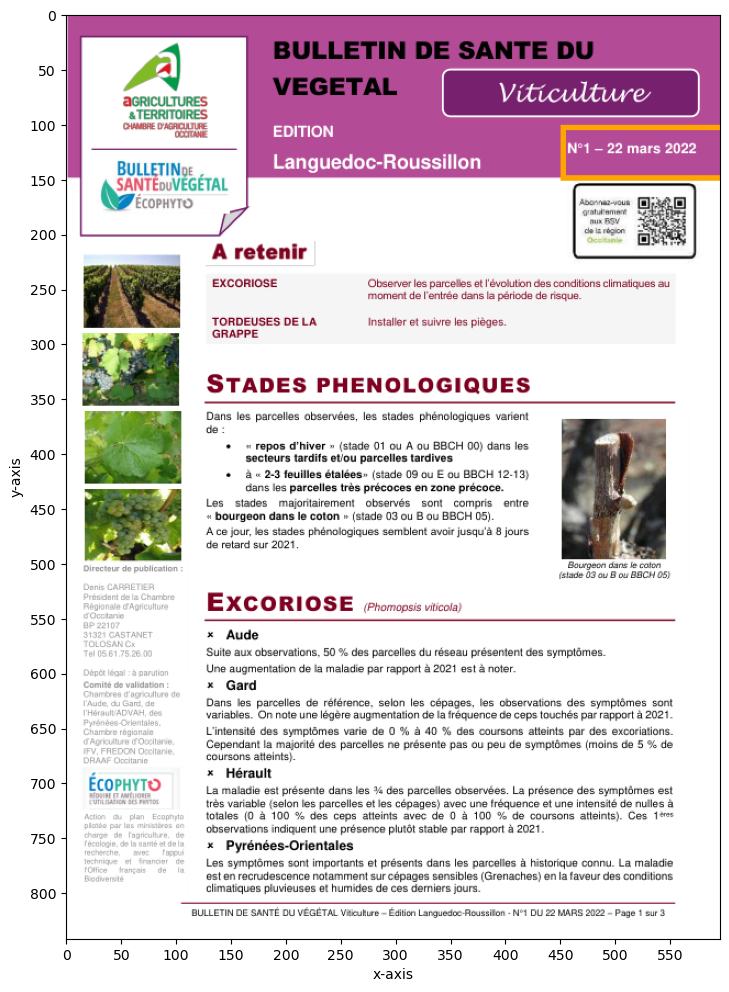

N°1 – 22 mars 2022


In [18]:
import os
from PIL import Image, ImageDraw
import fitz
import matplotlib.pyplot as plt

def get_text_in_zone(page, coords, draw_rectangle=False):
    if draw_rectangle:
        x1, y1, x2, y2 = coords
        pix = page.get_pixmap()
        img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
        draw = ImageDraw.Draw(img)

        draw.rectangle((x1, y1, x2, y2), outline="orange", width=5)

        plt.figure(figsize=(12, 12))
        plt.imshow(img)
        plt.xlabel('x-axis')
        plt.ylabel('y-axis')
        plt.xticks(range(0, pix.width, 50))
        plt.yticks(range(0, pix.height, 50))
        # plt.grid(True)
        plt.show()

    text = ""
    extracted_text = page.get_text("dict", sort=False, flags=fitz.TEXTFLAGS_TEXT)
    # Sort the blocks by their y-coordinates
    sorted_blocks = sorted(extracted_text["blocks"], key=lambda x: x["bbox"][1])

    for block in sorted_blocks:
        if block["type"] == 0:
            for line in block["lines"]:
                for span in line["spans"]:
                    span_bbox = span["bbox"]

                    if span_bbox[0] >= coords[0] and span_bbox[1] >= coords[1] and span_bbox[2] <= coords[2] and span_bbox[3] <= coords[3]:
                      if len(span["text"])>3:
                        text += span["text"] + " "
                      else:
                        text += span["text"]
                text = text.strip()

    return text.strip()

page = doc.load_page(0)
text = get_text_in_zone(page, (450, 100, 600, 150), draw_rectangle=True)
print(text)

In [19]:
page

page 0 of unibsv/data/UniBSV/BSV Languedoc-Roussillon/BSV_VITI_LR_N01_22032022.pdf

[594.3200073242188, 840.9199829101562, 595.3200073242188, 841.9199829101562]


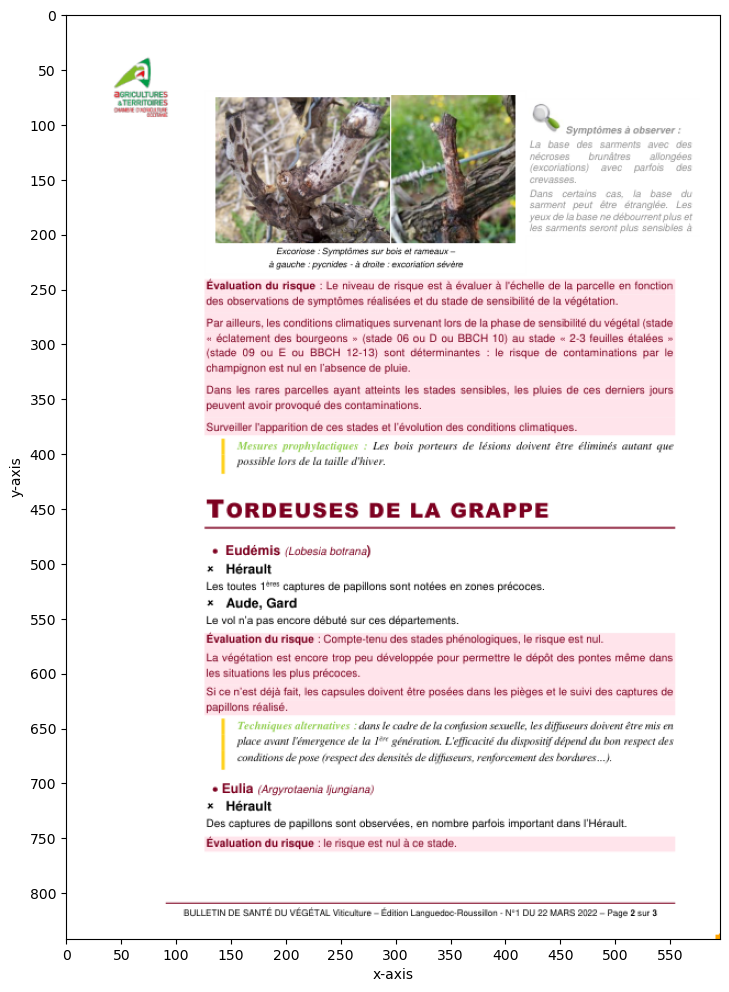

In [20]:
page = doc.load_page(1)

def clamp_zone_to_page(page, zone_coords):

    page_width, page_height = page.rect[2], page.rect[3]

    clamped_coords = [
        max(0, min(zone_coords[0], page_width - 1)),
        max(0, min(zone_coords[1], page_height - 1)),
        min(zone_coords[2], page_width),
        min(zone_coords[3], page_height),
    ]

    return clamped_coords

def get_block_numbers_in_zone(page, bbox):
    bbox = clamp_zone_to_page(page, bbox)
    print(bbox)
    block_numbers = []
    extracted_text = page.get_text("dict", sort=False, flags=fitz.TEXTFLAGS_TEXT)

    for block in extracted_text["blocks"]:
        if block["type"] == 0:
            block_bbox = block["bbox"]

            if block_bbox[0] >= bbox[0] and block_bbox[1] >= bbox[1] and block_bbox[2] <= bbox[2] and block_bbox[3] <= bbox[3]:
                block_numbers.append(block["number"])

    return block_numbers

get_block_numbers_in_zone(page, (22220,2000,2500,22220))
text = get_text_in_zone(page, (594.3200073242188, 840.9199829101562, 595.3200073242188, 841.9199829101562), draw_rectangle=True)


In [21]:
def calculate_intersection_area(bbox1, bbox2):
    x1 = max(bbox1[0], bbox2[0])
    y1 = max(bbox1[1], bbox2[1])
    x2 = min(bbox1[2], bbox2[2])
    y2 = min(bbox1[3], bbox2[3])

    if x1 < x2 and y1 < y2:
        return (x2 - x1) * (y2 - y1)
    return 0


def get_block_numbers_in_zone(page, bbox, threshold=0.8):
    block_numbers = []
    extracted_text = page.get_text("dict", sort=False, flags=fitz.TEXTFLAGS_TEXT)

    for block in extracted_text["blocks"]:
        if block["type"] == 0:
            block_bbox = block["bbox"]
            intersection_area = calculate_intersection_area(block_bbox, bbox)

            block_area = (block_bbox[2] - block_bbox[0]) * (block_bbox[3] - block_bbox[1])
            overlap_ratio = intersection_area / block_area

            if overlap_ratio >= threshold:
                block_numbers.append(block["number"])

    return block_numbers
get_block_numbers_in_zone(page,(0, 500, 0, 150))

[]

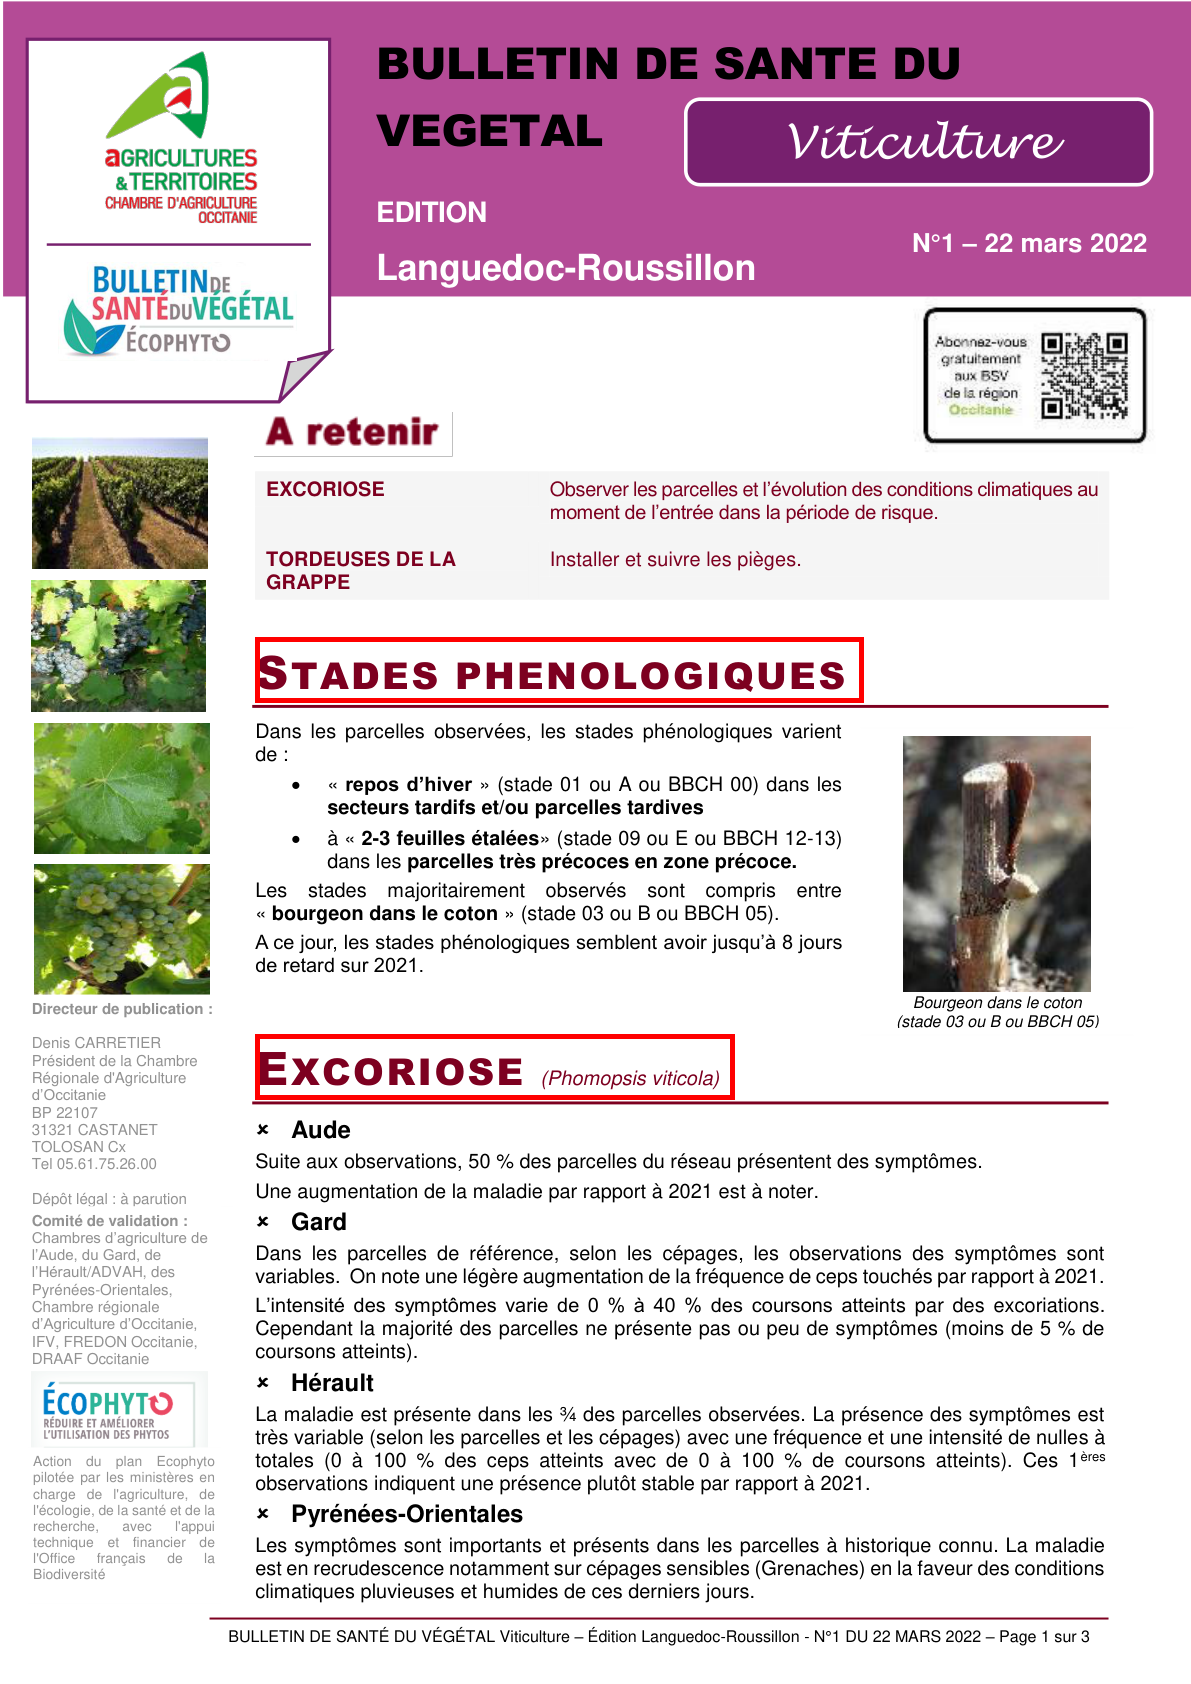

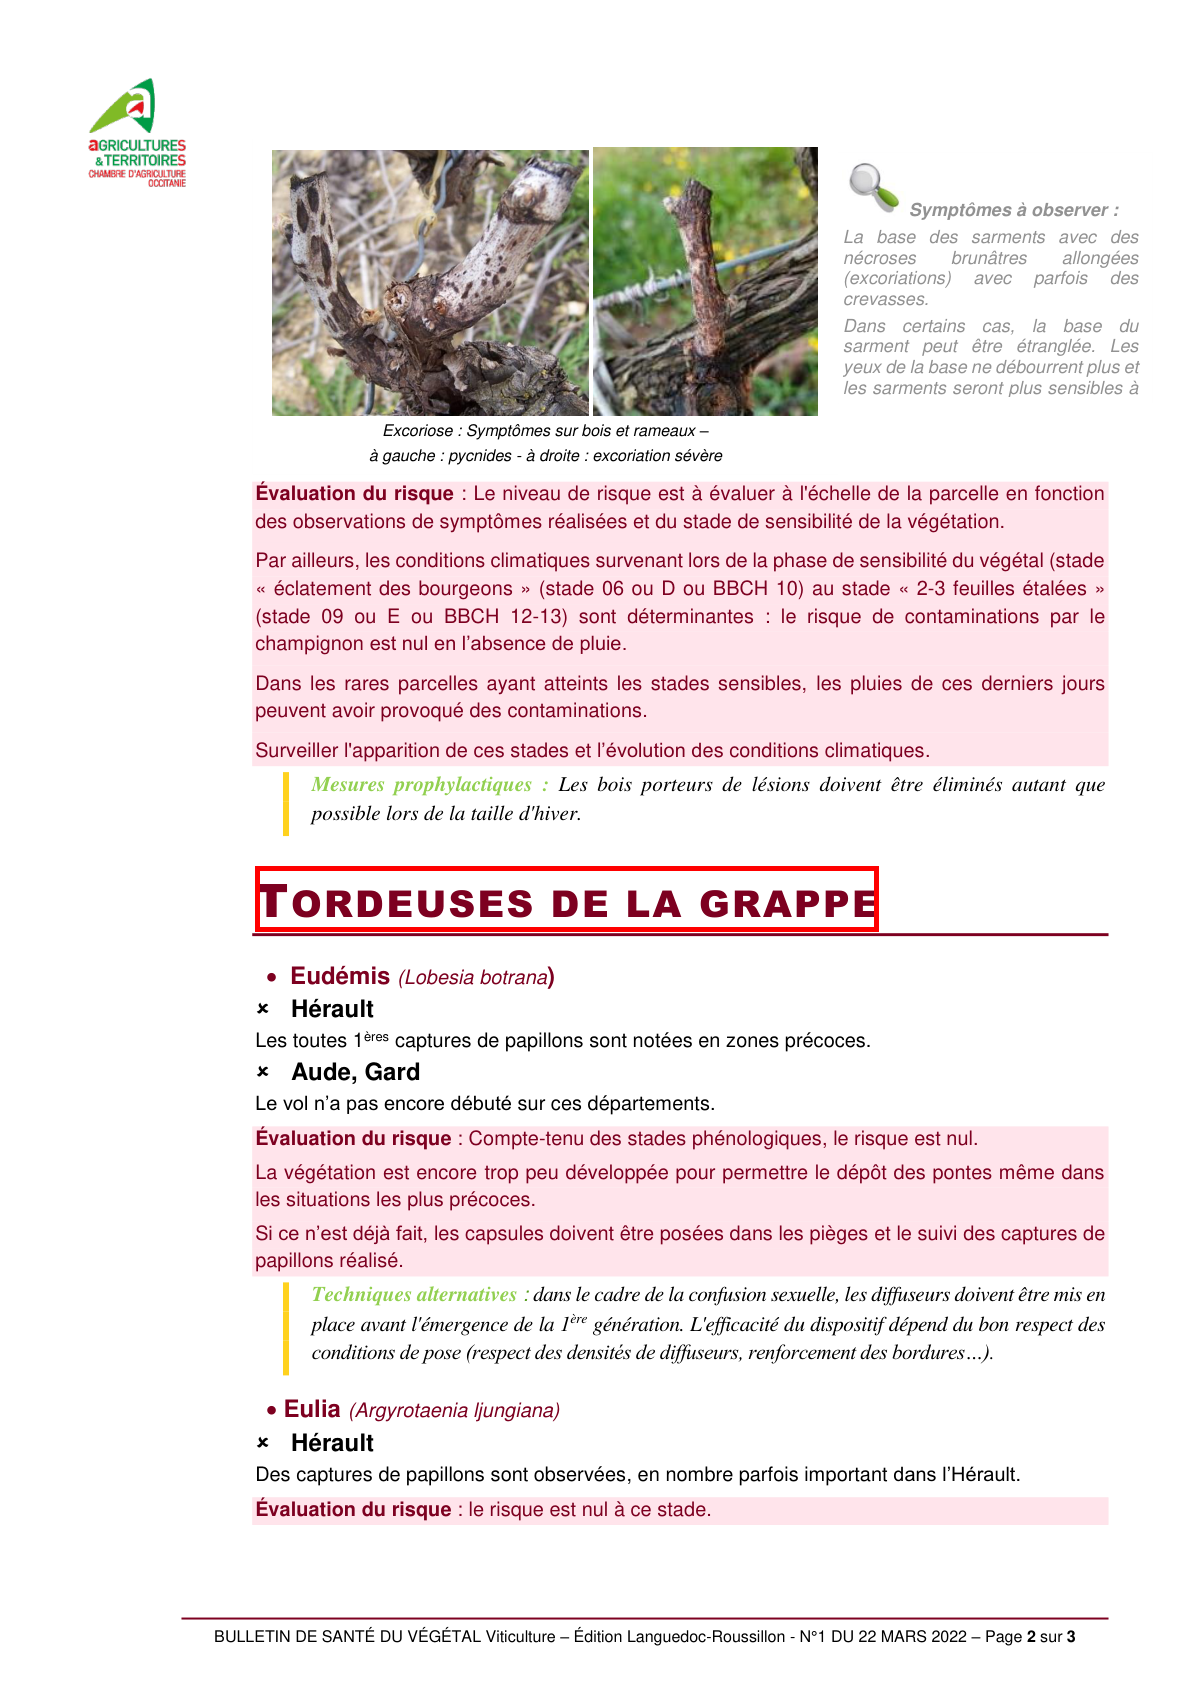

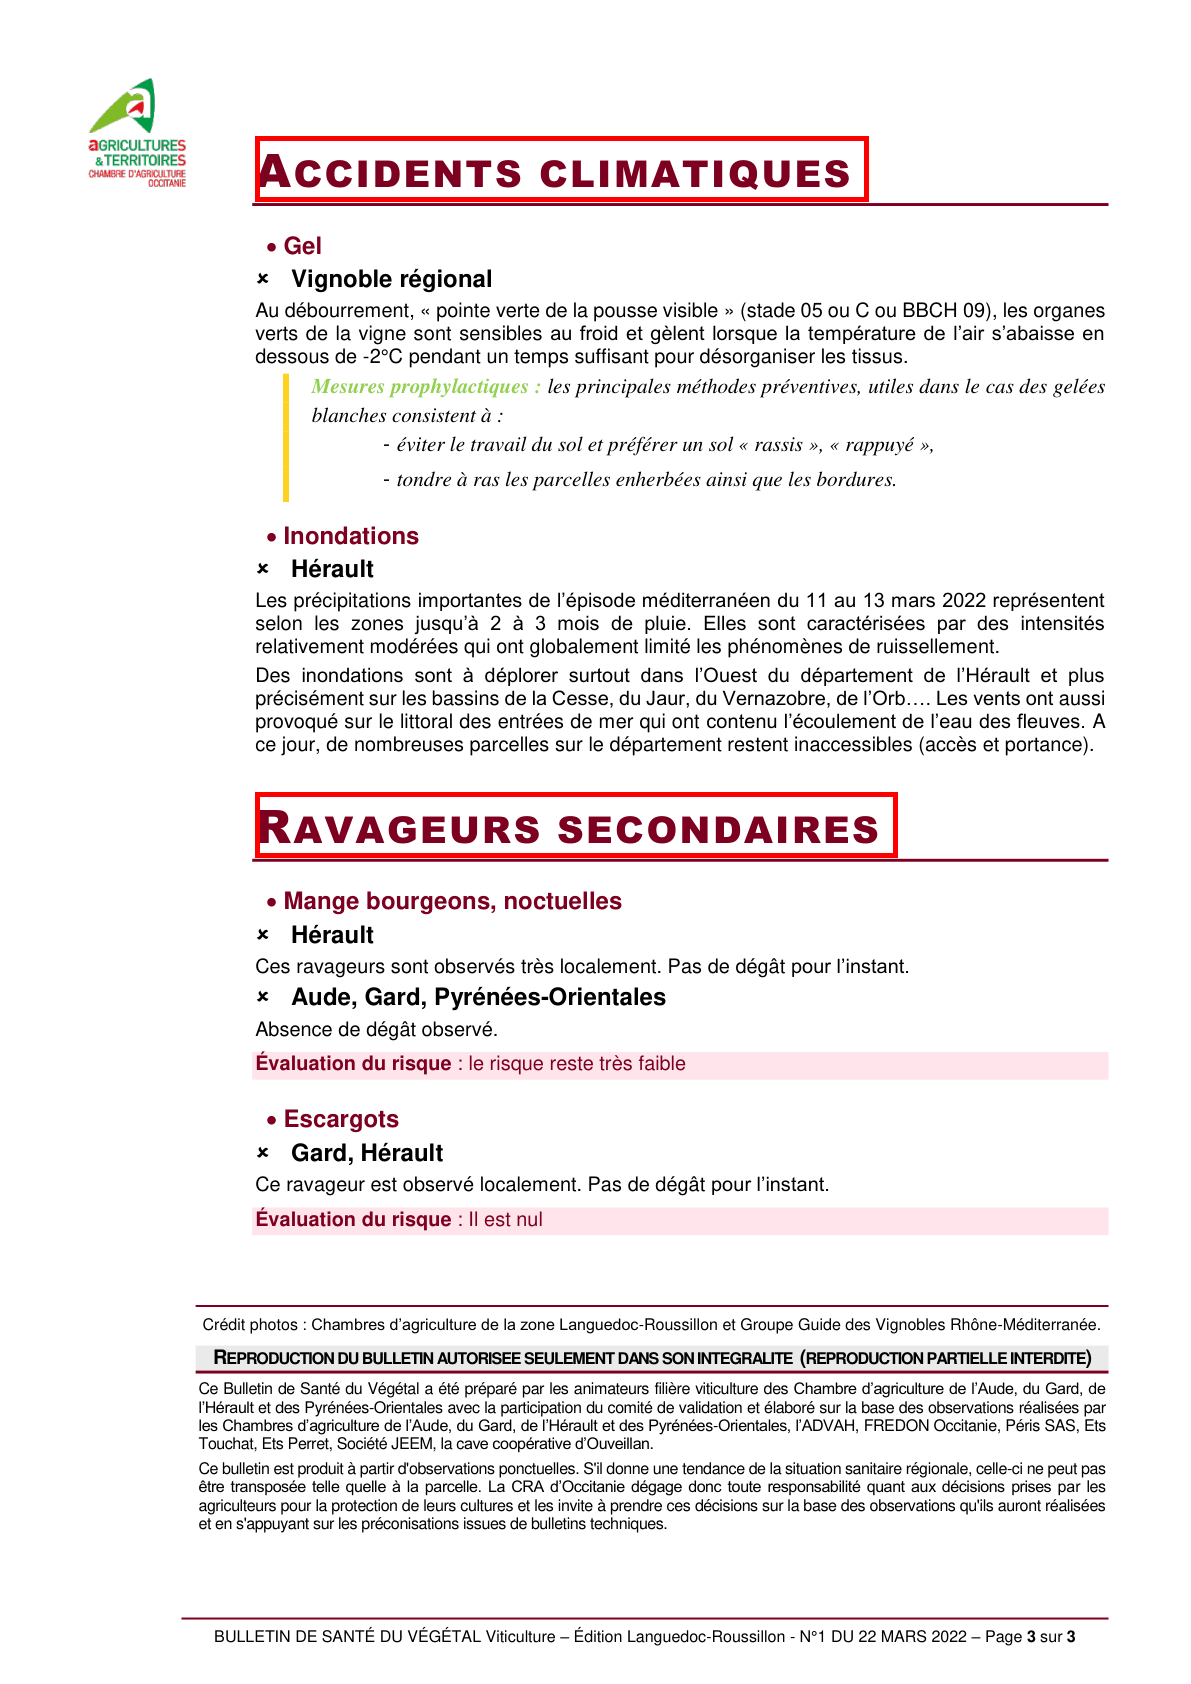

In [22]:
import os
from PIL import Image, ImageDraw
import fitz
import numpy as np

def draw_rectangles(pix, bbox_coords, color="orange"):
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    draw = ImageDraw.Draw(img)

    for bbox in bbox_coords:
        scaled_bbox = [coord * 2 for coord in bbox]
        draw.rectangle(scaled_bbox, outline=color, width=5)

    return img
    
def merge_neighbor_bboxes(bbox_coords, threshold=50):
    def overlap_y(bbox1, bbox2):
        y1_1, y2_1 = bbox1[1], bbox1[3]
        y1_2, y2_2 = bbox2[1], bbox2[3]
        return (abs(y1_1 - y1_2) < threshold or abs(y1_1 - y2_2) < threshold) or \
               (abs(y2_1 - y1_2) < threshold or abs(y2_1 - y2_2) < threshold)

    def merge_bbox(bbox1, bbox2):
        return [min(bbox1[0], bbox2[0]), min(bbox1[1], bbox2[1]),
                max(bbox1[2], bbox2[2]), max(bbox1[3], bbox2[3])]

    merged = True
    while merged:
        merged = False
        new_bbox_coords = []
        merged_indices = []

        for i, bbox1 in enumerate(bbox_coords):
            if i in merged_indices:
                continue

            new_bbox = bbox1
            for j, bbox2 in enumerate(bbox_coords):
                if j in merged_indices or i == j:
                    continue

                if overlap_y(new_bbox, bbox2):
                    new_bbox = merge_bbox(new_bbox, bbox2)
                    merged = True
                    merged_indices.append(j)

            new_bbox_coords.append(new_bbox)

        bbox_coords = new_bbox_coords

    return bbox_coords

def process_sections(page, threshold = 50):
    saved_bbox = []
    bbox_coords = []
    identified_sections = []
    identified_sections_coords = []

    page_blocks = page.get_text("dict", sort=False, flags=fitz.TEXTFLAGS_TEXT)

    for block in page_blocks["blocks"]:
        if block["type"] == 0:
            for line in block["lines"]:
                for span in line["spans"]:
                    if span["size"] > 15 and span["color"] == 8192032:
                        saved_bbox.append(span["bbox"])
                        
    for s_bbox in saved_bbox:
        bbox_coords.append([coord for coord in s_bbox])

    bbox_coords = merge_neighbor_bboxes(bbox_coords, threshold)
    for bbox in bbox_coords:
      foo = [coord for coord in bbox]
      found_text = get_text_in_zone(page, foo, draw_rectangle=False)
      if len(found_text) > 2:
        identified_sections.append(found_text)
        identified_sections_coords.append(foo)
    return bbox_coords, identified_sections, identified_sections_coords

def process_document(pdf_path, output_dir="output_dict", draw_in_between_zones=False):
    pdf_name = os.path.splitext(os.path.basename(pdf_path))[0]
    os.makedirs(os.path.join(output_dir, pdf_name), exist_ok=True)
    image_path = os.path.join(output_dir, pdf_name)

    doc = fitz.open(pdf_path)

    identified_sections = []
    identified_sections_coords = []

    for page_num, page_i in enumerate(doc):
        bbox_coords, sections, coords = process_sections(page_i)

        identified_sections.extend(sections)
        identified_sections_coords.extend(coords)

        if len(bbox_coords) > 0:
            pix = page_i.get_pixmap(matrix=fitz.Matrix(2, 2))
            img = draw_rectangles(pix, bbox_coords, color="RED")

            in_between_zones = []

            for i in range(len(coords)):
                zone_start = coords[i][3]  # y2 of the current section
                if i < len(coords) - 1:
                    zone_end = coords[i + 1][1]  # y1 of the next section
                else:
                    zone_end = pix.height/2  # bottom of the current page
                in_between_zones.append((coords[i][0]-10, zone_start + 5, pix.width/2, zone_end - 5))

            if page_num == len(doc) - 1:
                zone_start = coords[-1][3]  # y2 of the last section
                zone_end = pix.height/2  # bottom of the last page
                in_between_zones.append((0, zone_start + 5, pix.width/2, zone_end))

            if draw_in_between_zones:
                img = draw_rectangles(pix, in_between_zones, color="green")

            image_name = f"page{page_num + 1}.png"
            image_path_name = os.path.join(image_path, image_name)
            img.save(image_path_name)
            display(img)

            # for zone in in_between_zones:
              # text = get_text_in_zone(page, zone, draw_rectangle=False)
              # print(f"\n{text}\n")

    # Calculate in-between zones for the entire document
    # in_between_zones = []

    return identified_sections, identified_sections_coords, in_between_zones


# Processing : 
identified_sections, identified_sections_coords, in_between_zones = process_document(pdf_path, draw_in_between_zones=False)


In [23]:
print("Identified sections:")
for section in identified_sections:
    print(f"- {section}")

print("\nIdentified sections coordinates:")
for coord in identified_sections_coords:
    print(coord)

# print("\nIn-between zones:")
# for zone in in_between_zones:
#     print(zone)


Identified sections:
- STADES PHENOLOGIQUES
- EXCORIOSE  (Phomopsis viticola)
- TORDEUSES DE LA GRAPPE
- ACCIDENTS CLIMATIQUES
- RAVAGEURS SECONDAIRES

Identified sections coordinates:
[127.58000183105469, 318.97247314453125, 431.833740234375, 351.4624938964844]
[127.58000183105469, 517.3524780273438, 367.39373779296875, 549.8424682617188]
[127.58000183105469, 433.09246826171875, 439.43548583984375, 465.5824890136719]
[127.58000183105469, 68.12248229980469, 434.353759765625, 100.61248016357422]
[127.58000183105469, 396.0124816894531, 448.6337585449219, 428.50250244140625]


In [24]:
import os
import glob
# Set the path of the folder containing PDF files
folder_path = "/content/unibsv/data/UniBSV/BSV Languedoc-Roussillon"

global_sections_list = []

# Use the glob module to find all PDF files in the folder
pdf_files = glob.glob(os.path.join(folder_path, "*.pdf"))

# Loop through each PDF file
for pdf_file in pdf_files:
    # Do something with the PDF file
    print(f"*** Document : {pdf_file} ***\n")
    identified_sections, identified_sections_coords, in_between_zones = process_document(pdf_file, draw_in_between_zones=False)

    global_sections_list.extend(identified_sections)
    
    print("Identified sections:")
    for section in identified_sections:
        print(f"- {section}")
    print("\n")

In [25]:
# duplicates removal
my_list = sorted(set(global_sections_list))
display(my_list)

[]

## Extraction des contenus des sections grâce aux numéros de blocs intermédiaires

In [26]:
page = doc.load_page(1)
text_dict = page.get_text("dict", sort=False, flags=fitz.TEXTFLAGS_TEXT)
for elt in text_dict.items():
  print(elt)

('width', 595.32)
('height', 841.92)
('blocks', [{'number': 0, 'type': 0, 'bbox': (127.58000183105469, 27.600006103515625, 130.07586669921875, 38.6400032043457), 'lines': [{'spans': [{'size': 11.039999961853027, 'flags': 0, 'font': 'Calibri', 'color': 0, 'ascender': 0.75, 'descender': -0.25, 'text': ' ', 'origin': (127.58000183105469, 35.8800048828125), 'bbox': (127.58000183105469, 27.600006103515625, 130.07586669921875, 38.6400032043457)}], 'wmode': 0, 'dir': (1.0, 0.0), 'bbox': (127.58000183105469, 27.600006103515625, 130.07586669921875, 38.6400032043457)}]}, {'number': 1, 'type': 0, 'bbox': (107.05999755859375, 812.3729858398438, 540.0551147460938, 823.4842529296875), 'lines': [{'spans': [{'size': 8.039999961853027, 'flags': 0, 'font': 'Arial', 'color': 0, 'ascender': 1.0750000476837158, 'descender': -0.29899999499320984, 'text': 'BULLETIN DE SANTÉ DU VÉGÉTAL Viticulture – Édition Languedoc-Roussillon - N°1 DU 22 MARS 2022 – Page ', 'origin': (107.05999755859375, 821.0159912109375),

## Conversion en format HTML pour observer la hierarchie

In [27]:
from io import StringIO
from pdfminer.high_level import extract_text_to_fp
from pdfminer.layout import LAParams
import codecs
import os
import IPython

# Create output folder if it doesn't exist
if not os.path.exists("XHTML"):
    os.mkdir("XHTML")

output_string = StringIO()
with open(pdf_path, 'rb') as fin:
    extract_text_to_fp(fin, output_string, laparams=LAParams(),
                       output_type='html', codec=None)

# Save output as .xhtml file in output folder
with codecs.open('XHTML/output.xhtml', 'w', encoding='utf-8') as f:
    f.write(output_string.getvalue().strip())

# Display xhtml content in notebook
with codecs.open('XHTML/output.xhtml', 'r', encoding='utf-8') as f:
    xhtml_content = f.read()

IPython.display.HTML(xhtml_content)


## Extraction des images

In [28]:
import fitz
import PIL.Image
import io
import os

In [29]:
pdf = fitz.open(pdf_path)
counter = 1
page_counter = 0
for i in range(len(pdf)):
    page_counter += 1
    page = pdf[i]
    images = page.get_images()
    for image in images:
        base_img = pdf.extract_image(image[0])
        image_data = base_img["image"]
        img = PIL.Image.open(io.BytesIO(image_data))
        extension = base_img["ext"]
        folder = f'extracted_images/page_{page_counter}'
        if not os.path.exists(folder):
            os.makedirs(folder)
        img.save(open(f'{folder}/image{counter}.{extension}', "wb"))
        counter += 1
    if counter ==1:
        break